In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.tree import Tree, InclusiveParticleNode
from smodels.theory.auxiliaryFunctions import bracketToProcessStr
from smodels.experiment.defaultFinalStates import finalStates
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.theory.tree import Tree
from smodels.theory.treeMatcher import TreeMatcher
from smodels.tools.physicsUnits import fb, GeV
from smodels.theory.element import Element
import networkx as nx
import networkx.algorithms.isomorphism.isomorphvf2 as vf2

In [2]:
slhafile="../inputFiles/slha/lightEWinos.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)

In [3]:
elA = Element("[ [ ['e-','nu'] ], [['ta+','ta-'],['u,u~']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','N1'])
elB = Element("[ ['*'], [ ['nu','L'] ] ]",model=finalStates,
              sort=False,finalState=['MET','MET'])

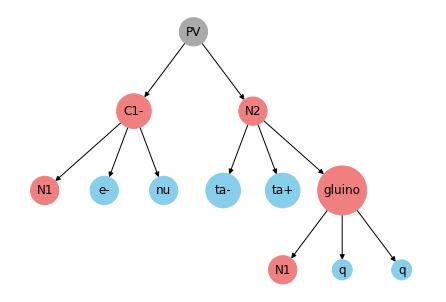

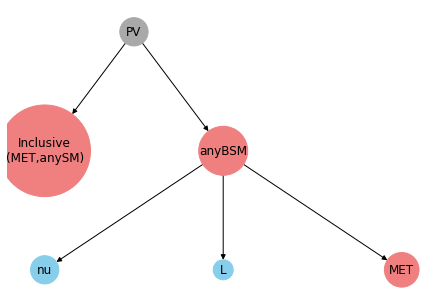

In [4]:
elA.drawTree()
elB.drawTree()

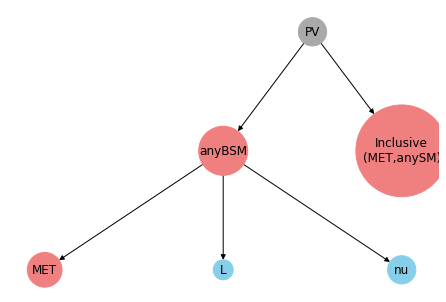

[PV, anyBSM, Inclusive, MET, L, nu]
[0, 1, 2, 3, 4, 5]
[(PV, anyBSM), (PV, Inclusive), (anyBSM, MET), (anyBSM, L), (anyBSM, nu)]


In [5]:
cmp,matched = elA.compareTo(elB)
matched.drawTree()
print(matched.tree.nodes)
print([n.node for n in matched.tree.nodes])
print(matched.tree.edges)

In [6]:
print(elA)
print(elB)
print(matched)

(PV > C1-(1),N2(2)), (C1-(1) > N1,e-,nu), (N2(2) > ta-,ta+,gluino(3)), (gluino(3) > N1,q,q)
(PV > Inclusive(1),anyBSM(2)), (anyBSM(2) > nu,L,MET), (Inclusive(1) > MET,anySM)
(PV > anyBSM(1),Inclusive(2)), (anyBSM(1) > MET,L,nu), (Inclusive(2) > MET,anySM)


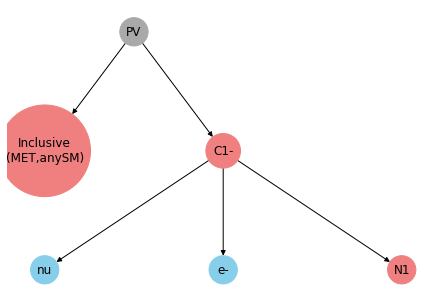

[PV, Inclusive, C1-, nu, e-, N1]
[0, 1, 2, 5, 6, 7]
[(PV, Inclusive), (PV, C1-), (C1-, nu), (C1-, e-), (C1-, N1)]


In [7]:
cmp,matched = elB.compareTo(elA)
matched.drawTree()
print(matched.tree.nodes)
print([n.node for n in matched.tree.nodes])
print(matched.tree.edges)

In [8]:
print(elB)
print(elA)
print(matched)

(PV > Inclusive(1),anyBSM(2)), (anyBSM(2) > nu,L,MET), (Inclusive(1) > MET,anySM)
(PV > C1-(1),N2(2)), (C1-(1) > N1,e-,nu), (N2(2) > ta-,ta+,gluino(3)), (gluino(3) > N1,q,q)
(PV > Inclusive(1),C1-(2)), (C1-(2) > nu,e-,N1), (Inclusive(1) > MET,anySM)


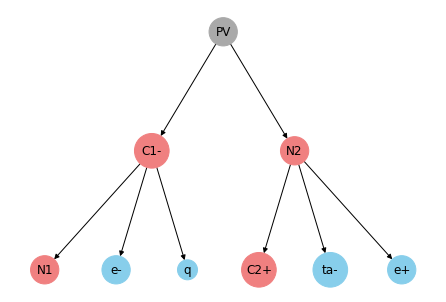

In [9]:
elC = Element("[ [ ['e-','q'] ], [['e+','ta-']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','C2+'])
elC.drawTree()

In [10]:
cmp,matched = elB.compareTo(elC)
print(cmp,matched)
cmp,matched = elC.compareTo(elB)
print(cmp,matched)
cmp,matched = elC.compareTo(elA)
print(cmp,matched)
cmp,matched = elA.compareTo(elC)
print(cmp,matched)

-1 None
1 None
-1 None
1 None


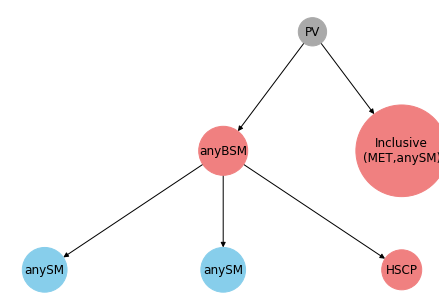

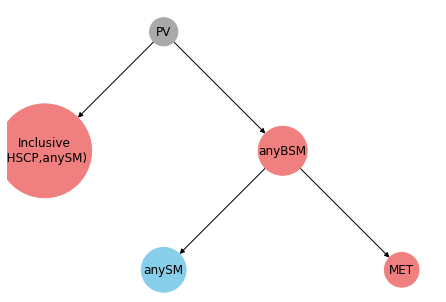

In [11]:
elA = Element("[ [ ['*','*'] ], ['*'] ]",model=finalStates, 
              finalState=['HSCP','MET'],sort=False)
elB = Element("[ ['*'], [ ['*'] ] ]",model=finalStates,
              finalState=['HSCP','MET'],sort=False)
elA.drawTree()
elB.drawTree()

In [12]:
cmp,matched = elA.compareTo(elB)
print(cmp,matched)

WARNING in treeMatcher.getMatches() in 78: Comparing two trees with inclusive nodes.The comparison will likely produce wrong results!


1 None


In [13]:
cmp,matched = elB.compareTo(elA)
print(cmp,matched)

WARNING in treeMatcher.getMatches() in 78: Comparing two trees with inclusive nodes.The comparison will likely produce wrong results!


-1 None
